# Import the required modules

In [1]:
!pip install git+https://github.com/goolig/dsClass.git

  Cloning https://github.com/goolig/dsClass.git to /tmp/pip-req-build-1ahkl4tg
  Running command git clone -q https://github.com/goolig/dsClass.git /tmp/pip-req-build-1ahkl4tg
  Resolved https://github.com/goolig/dsClass.git to commit 67567d1d71a8a747c8a68c621045fe53ff139103
     |████████████████████████████████| 278 kB 567 kB/s eta 0:00:01
  Created wheel for dsClass: filename=dsClass-1.0.27-py3-none-any.whl size=16372733 sha256=3ff68ca27e2b58d3d859308144705dacf4695caf2f646de6d2effde22bcdf66f
  Stored in directory: /tmp/pip-ephem-wheel-cache-vnne99dc/wheels/cc/7d/ca/f5036d591d94a23e6ab49777866b7fc723500ce0dcdb2a9b2e
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=7b53420fd7bbb7b8ce34dd39e83181cf454d4195338c7784af4adb92363f8d55
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built dsClass pydotplus


In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, SelectKBest, SelectFpr
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
from pandas_profiling import ProfileReport
from dsClass.path_helper import *

In [3]:
#!pip install pandas_profiling

# Load the time-series data and lookt at the features statistics

In [4]:
ts_file_path = get_file_path('ts_data.csv')
ts_data = pd.read_csv(ts_file_path)
print(ts_data.shape)
ts_data.head(30)                     #for every hdd the fail will be for all the 20 rows true or false, there wont be switch from false to true

(204000, 9)


,d_id,time,bb_count,r-w_rate,reconsects_count,recovbydrv_count,xfer_rate,bb_diffs,fail
0,1,V1,-5,14,0,9,85,0,True
1,1,V2,5,15,0,17,76,0,True
2,1,V3,14,11,0,24,87,0,True
3,1,V4,22,7,0,31,75,0,True
4,1,V5,29,11,0,42,81,0,True
5,1,V6,38,11,0,49,69,0,True
6,1,V7,46,13,0,59,81,0,True
7,1,V8,59,9,0,67,104,0,True
8,1,V9,65,18,0,80,72,0,True
9,1,V10,71,11,0,89,73,0,True


In [5]:
ts_data.groupby('fail').describe()

d_id                                                        \
          count    mean          std    min      25%     50%      75%   
fail                                                                    
False  200000.0  5200.5  2886.758548  201.0  2700.75  5200.5  7700.25   
True     4000.0   100.5    57.741523    1.0    50.75   100.5   150.25   

                bb_count              ... xfer_rate         bb_diffs           \
           max     count        mean  ...       75%    max     count     mean   
fail                                  ...                                       
False  10200.0  200000.0   97.986965  ...      83.0  148.0  200000.0  3.01709   
True     200.0    4000.0  122.358000  ...     104.0  145.0    4000.0  1.04475   

                                           
            std  min  25%  50%  75%   max  
fail                                       
False  2.466513  0.0  1.0  3.0  4.0  22.0  
True   1.390227  0.0  0.0  0.0  2.0   9.0  

[2 rows x 56 columns]

In [6]:
report=ProfileReport(ts_data, title='Time Series Data')

In [7]:
report

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Plot the time series data

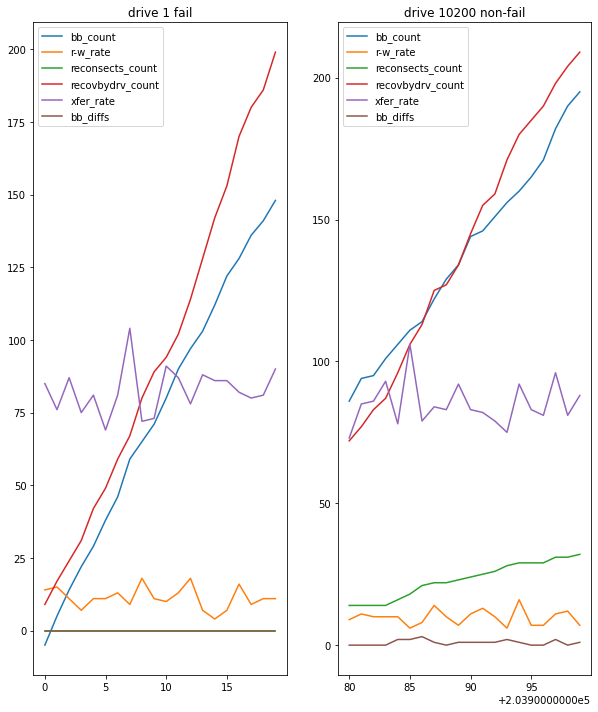

In [8]:
original_features = ['bb_count', 'r-w_rate', 'reconsects_count',
       'recovbydrv_count', 'xfer_rate', 'bb_diffs']

fig, axes = plt.subplots(nrows=1, ncols=2)

ts_data.loc[ts_data['d_id']==1,original_features].plot(figsize=(10,12), title='drive '+str(1)+' fail', ax=axes[0])

num_drives = ts_data['d_id'].unique().shape[0]
#num_drives

ts_data.loc[ts_data['d_id']==num_drives,original_features].plot(figsize=(10,12), title='drive '+str(num_drives)+' non-fail', ax=axes[1])
plt.legend()

# Engineer the time-series features

For each Create the aggregated features (mean, median, variance, minimum and naximum):
* for each sn
* for each feature
* for each aggregation type
        aggregate the 20 daily samples into one aggregated sample  

In [9]:
#Q1
statDf = pd.DataFrame()
groupByDF = ts_data.groupby('d_id')
statDf['fail'] = groupByDF['fail'].min()

for currCol in ts_data.columns:   
    if currCol not in ['d_id', 'time', 'fail']:     #we don't want time, d_id and fail columns becuase there stats won't "make sense"
        statDf[currCol + '_mean'] = groupByDF[currCol].mean()
        statDf[currCol + '_median'] = groupByDF[currCol].median()
        statDf[currCol + '_var'] = groupByDF[currCol].var()
        statDf[currCol + '_min'] = groupByDF[currCol].min()
        statDf[currCol + '_max'] = groupByDF[currCol].max()
    
statDf

,fail,bb_count_mean,bb_count_median,bb_count_var,bb_count_min,bb_count_max,r-w_rate_mean,r-w_rate_median,r-w_rate_var,r-w_rate_min,...,xfer_rate_mean,xfer_rate_median,xfer_rate_var,xfer_rate_min,xfer_rate_max,bb_diffs_mean,bb_diffs_median,bb_diffs_var,bb_diffs_min,bb_diffs_max
d_id,,,,,,,,,,,,,,,,,,,,,
1,True,75.05,75.5,2307.313158,-5,148,11.30,11.0,13.694737,4,...,82.60,81.5,63.515789,69,104,0.00,0.0,0.000000,0,0
2,True,102.35,97.0,1794.976316,33,173,18.80,18.0,14.905263,13,...,82.55,83.5,51.944737,69,100,0.00,0.0,0.000000,0,0
3,True,153.30,152.0,3903.905263,56,249,20.00,21.5,29.368421,10,...,93.90,96.5,72.094737,77,104,0.00,0.0,0.000000,0,0
4,True,96.05,99.0,5173.839474,-26,202,20.00,19.5,8.000000,15,...,112.85,114.0,112.976316,94,134,0.00,0.0,0.000000,0,0
5,True,140.45,146.0,3759.628947,36,230,9.55,9.5,14.155263,4,...,94.75,93.0,83.671053,71,117,2.50,3.0,2.578947,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10196,False,110.00,115.5,3385.263158,8,196,8.55,8.0,15.944737,3,...,87.10,90.5,107.357895,69,103,0.65,1.0,0.344737,0,2
10197,False,123.40,127.0,3008.252632,30,214,15.20,15.5,25.536842,6,...,82.50,82.0,69.631579,70,98,4.80,5.0,5.852632,1,10
10198,False,52.95,56.5,259.734211,26,76,11.15,10.0,10.765789,5,...,70.65,71.0,113.186842,55,89,2.40,2.0,2.568421,0,7


# Load the cofiguration data

In [10]:
conf_file_path = get_file_path('conf_data.csv')
conf_data = pd.read_csv(conf_file_path)
conf_data.head()

,d_id,age,capacity,model,fail
0,1,15,1TB,Hitachi,True
1,2,23,1TB,Fujitsu,True
2,3,23,1TB,Seagate,True
3,4,14,1TB,Hitachi,True
4,5,18,600GB,Hitachi,True


# Look at the features\labels distribution

<AxesSubplot:title={'center':'age'}, xlabel='[fail]'>

<Figure size 432x288 with 0 Axes>

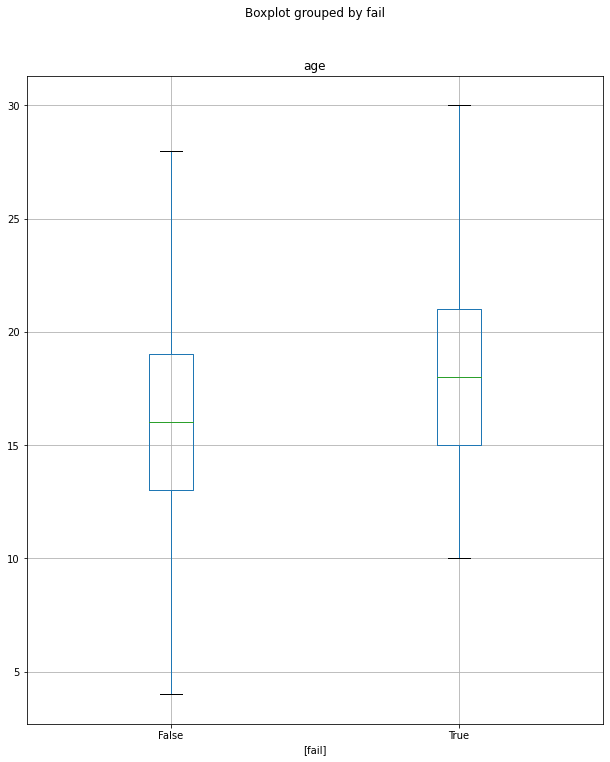

In [11]:
plt.figure()
conf_data[['age', 'fail']].boxplot(by='fail', figsize=(10,12), sym='')

<AxesSubplot:xlabel='model'>

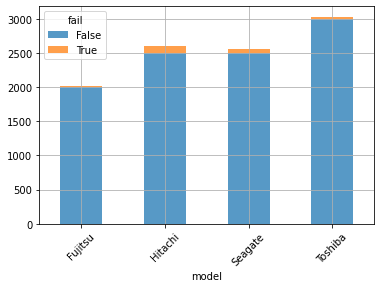

In [12]:
g = conf_data.groupby(["model", "fail"])['d_id'].count().unstack('fail')
g.plot(kind="bar", stacked=True, grid=True, alpha=0.75, rot=45)

# Handle categorical data 

For the decision tree algorithm, map the categorical features to numeric with:
* "Change_capacity" function for "capacity" column
* "pd.get_dummies" function for "model" column


In [13]:
#Q2
def change_capacity(data):
    # A function that receives a data frame and a column name as input and map the categorical capacity feature to numeric 
    di = dict(zip(conf_data["capacity"].unique(), [1000, 600, 300]))

    return data.replace({"capacity": di}, inplace=False)


In [14]:
new_conf_data = change_capacity(conf_data)
modelCol = new_conf_data.pop('model')
new_conf_data = new_conf_data.join(pd.get_dummies(modelCol))
new_conf_data

,d_id,age,capacity,fail,Fujitsu,Hitachi,Seagate,Toshiba
0,1,15,1000,True,0,1,0,0
1,2,23,1000,True,1,0,0,0
2,3,23,1000,True,0,0,1,0
3,4,14,1000,True,0,1,0,0
4,5,18,600,True,0,1,0,0
...,...,...,...,...,...,...,...,...
10195,10196,16,1000,False,0,0,1,0
10196,10197,25,600,False,0,1,0,0
10197,10198,23,300,False,0,1,0,0
10198,10199,13,600,False,0,0,1,0


# Merge the aggregated time-series and the configuration datasets

In [15]:
#Q3
new_df = pd.merge(new_conf_data, statDf, how='inner', on=['d_id','fail'])

failCol = new_df.pop('fail')

new_df.pop('d_id')
new_df

,age,capacity,Fujitsu,Hitachi,Seagate,Toshiba,bb_count_mean,bb_count_median,bb_count_var,bb_count_min,...,xfer_rate_mean,xfer_rate_median,xfer_rate_var,xfer_rate_min,xfer_rate_max,bb_diffs_mean,bb_diffs_median,bb_diffs_var,bb_diffs_min,bb_diffs_max
0,15,1000,0,1,0,0,75.05,75.5,2307.313158,-5,...,82.60,81.5,63.515789,69,104,0.00,0.0,0.000000,0,0
1,23,1000,1,0,0,0,102.35,97.0,1794.976316,33,...,82.55,83.5,51.944737,69,100,0.00,0.0,0.000000,0,0
2,23,1000,0,0,1,0,153.30,152.0,3903.905263,56,...,93.90,96.5,72.094737,77,104,0.00,0.0,0.000000,0,0
3,14,1000,0,1,0,0,96.05,99.0,5173.839474,-26,...,112.85,114.0,112.976316,94,134,0.00,0.0,0.000000,0,0
4,18,600,0,1,0,0,140.45,146.0,3759.628947,36,...,94.75,93.0,83.671053,71,117,2.50,3.0,2.578947,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195,16,1000,0,0,1,0,110.00,115.5,3385.263158,8,...,87.10,90.5,107.357895,69,103,0.65,1.0,0.344737,0,2
10196,25,600,0,1,0,0,123.40,127.0,3008.252632,30,...,82.50,82.0,69.631579,70,98,4.80,5.0,5.852632,1,10
10197,23,300,0,1,0,0,52.95,56.5,259.734211,26,...,70.65,71.0,113.186842,55,89,2.40,2.0,2.568421,0,7
10198,13,600,0,0,1,0,89.50,88.0,1597.631579,26,...,62.40,62.5,46.252632,49,76,4.10,4.0,3.357895,1,8


# Select the 10 most informative features and transform the data

In [16]:
#Q4
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=10)
selector.fit(new_df, list(failCol))
chosenCols = selector.get_support(indices=True)
filtered_df = new_df.iloc[:,chosenCols]
list(filtered_df.columns)

['r-w_rate_mean',
 'r-w_rate_median',
 'r-w_rate_min',
 'r-w_rate_max',
 'reconsects_count_mean',
 'reconsects_count_min',
 'xfer_rate_mean',
 'xfer_rate_median',
 'xfer_rate_min',
 'xfer_rate_max']

# Train a Decision tree classifier 

Since we are learning and testing on the same set we will limit the maximum depth parameter to 5 to prevent overfitting

In [43]:
#Q5
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import tree



X_train, X_test, y_train, y_test = train_test_split(filtered_df, list(failCol), test_size=0.2)
clf = DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train,y_train)

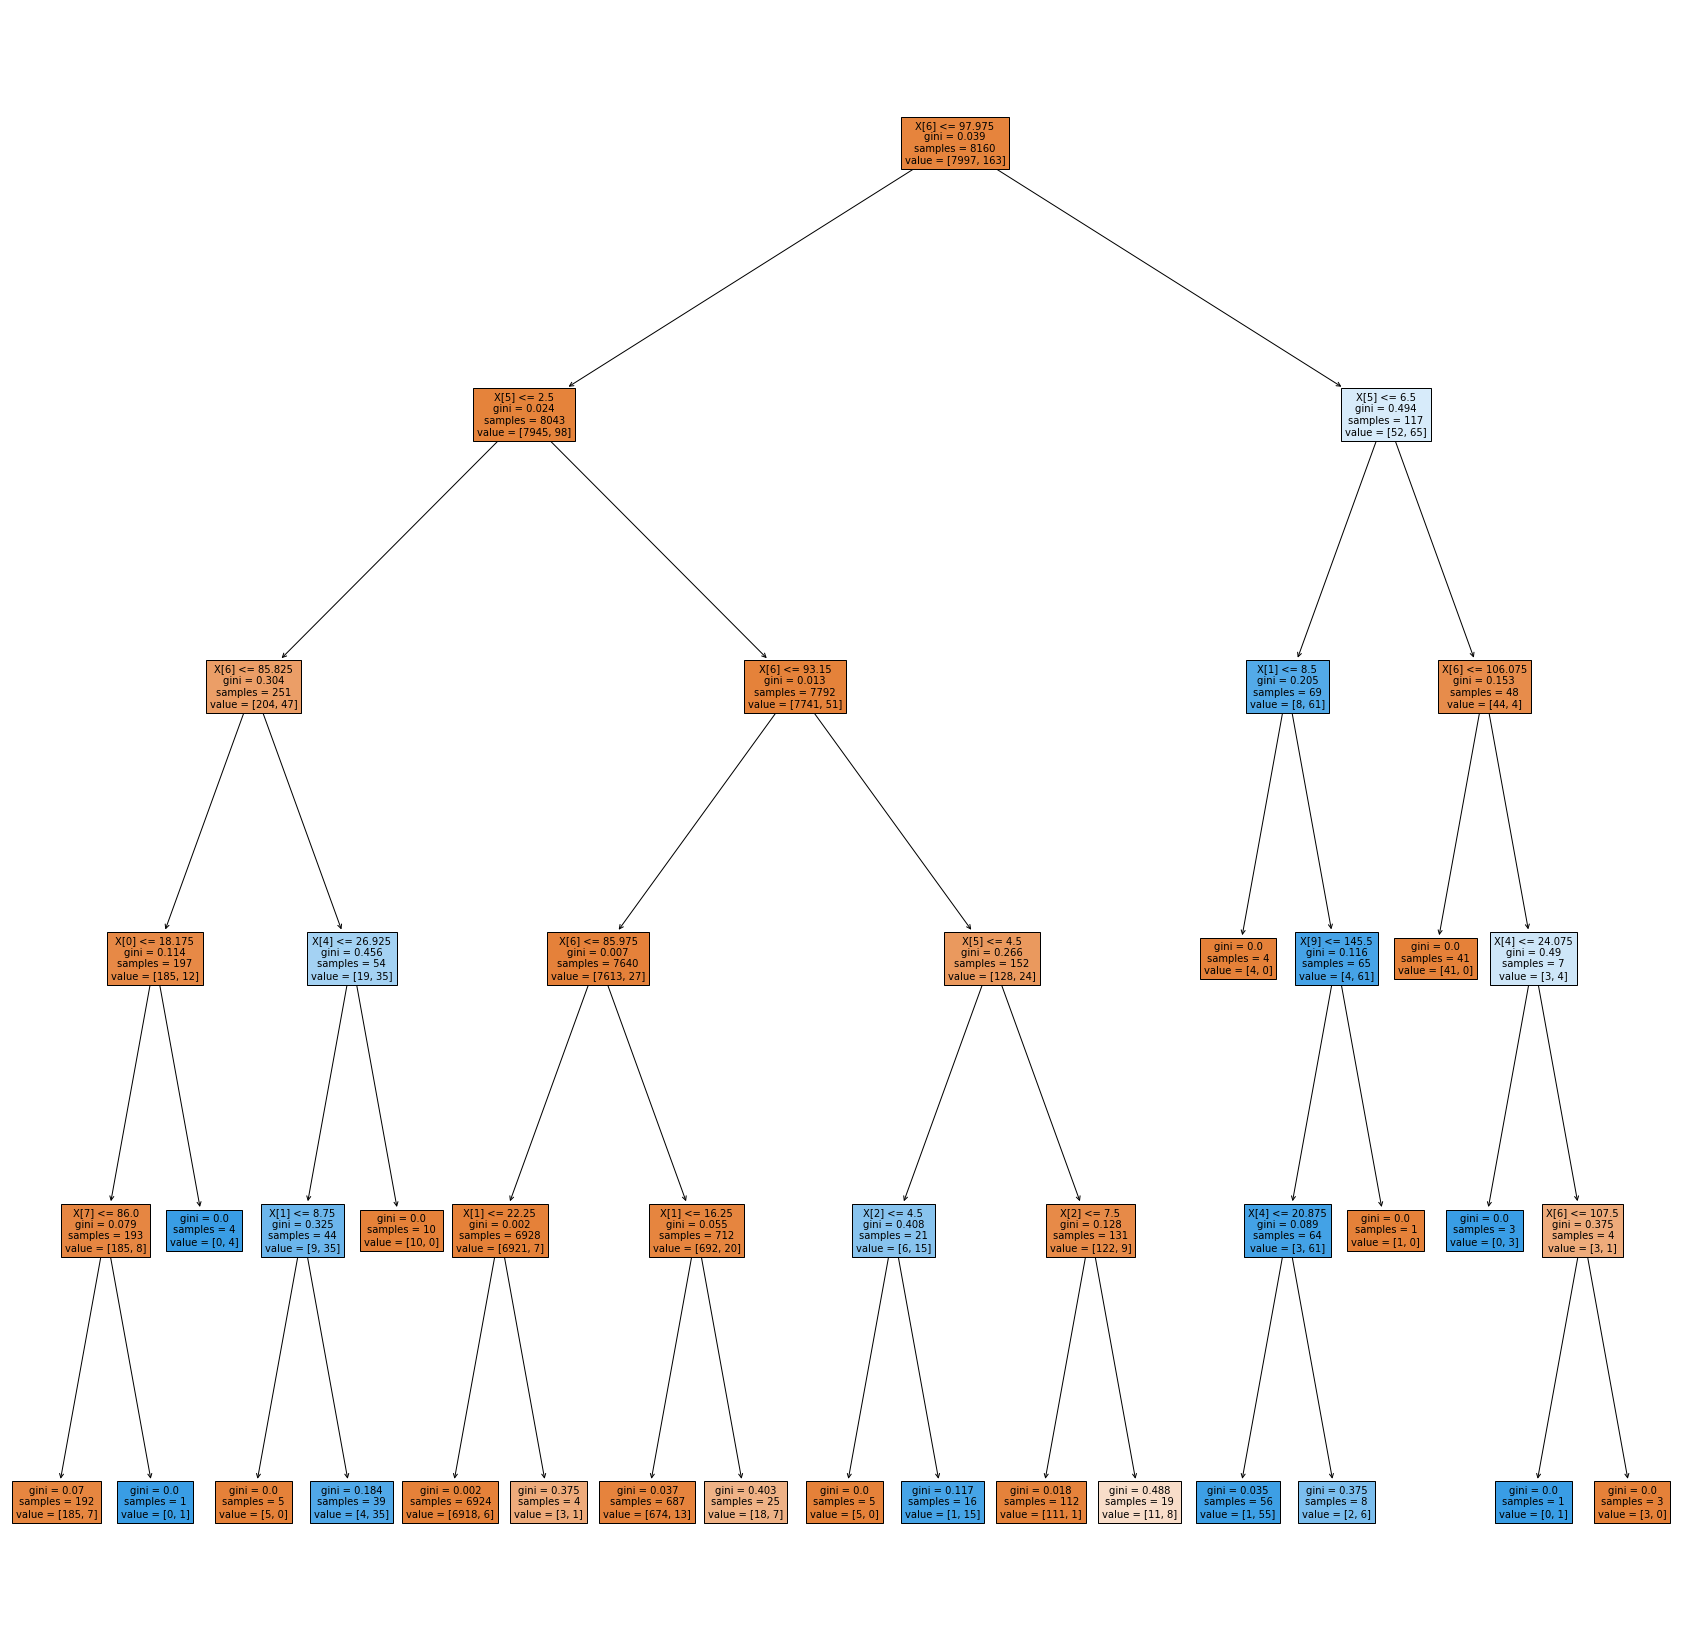

In [44]:
plt.figure(figsize=(30,30))  # set plot size (denoted in inches)
tree.plot_tree(clf, filled=True, fontsize = 10)
plt.show()

# Make the prediction and plot the confusion matrix
https://en.wikipedia.org/wiki/Confusion_matrix

* Change "max_depth" paramter to see what happens to model results


0.9882352941176471


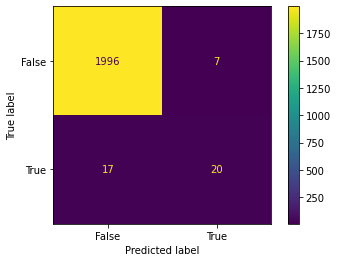

In [48]:
y_pred = clf.predict(X_test)

metrics.plot_confusion_matrix(clf,X_test,y_test)
print(metrics.accuracy_score(y_test, y_pred))

In [49]:
#Q6
results = {}
depths = [x for x in range(1,20)]
for currDepth in depths:
    clf = DecisionTreeClassifier(max_depth = currDepth)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    score = metrics.accuracy_score(y_test, y_pred)
    results[currDepth] = score

sortedDict = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

print('Sorted By Score:')
for k in sortedDict.keys():
    print(f'Depth {k} yields score of {sortedDict[k]}')

#We can see that if we maximize the depth its not neccesarily going to imrove the score, in fact it worsen it when it's above 10    

Sorted By Score:
Depth 5 yields score of 0.9877450980392157
Depth 8 yields score of 0.9877450980392157
Depth 3 yields score of 0.9872549019607844
Depth 4 yields score of 0.986764705882353
Depth 6 yields score of 0.986764705882353
Depth 2 yields score of 0.9862745098039216
Depth 7 yields score of 0.9862745098039216
Depth 9 yields score of 0.9852941176470589
Depth 11 yields score of 0.9852941176470589
Depth 14 yields score of 0.9852941176470589
Depth 10 yields score of 0.9848039215686275
Depth 16 yields score of 0.9848039215686275
Depth 17 yields score of 0.9848039215686275
Depth 18 yields score of 0.9848039215686275
Depth 13 yields score of 0.984313725490196
Depth 1 yields score of 0.9833333333333333
Depth 15 yields score of 0.9828431372549019
Depth 12 yields score of 0.9823529411764705
Depth 19 yields score of 0.9823529411764705


If you followed the instruction until Q6 then we can probably not rely on the reported performance when information about a new hard drive will arrive.

1) Explain in words what is the error.

2) Explain in words what you have to change in order to fix the error.

3) Fix the error. Submit a fixed notebook only

# Answers

#### 1) The data is not balanced, we have a lot of examples with fail = False and only a small portion with fail = True

#### 2) 
####   * If we have a massive anount of examples we can discard some of the fail = False samples so the data could be balanced
####   * We can multiply the samples with fail = True , but it can cause overfitting

#### 3) We can use skleran decision tree feature :  class_weight='balanced'

0.9524509803921568


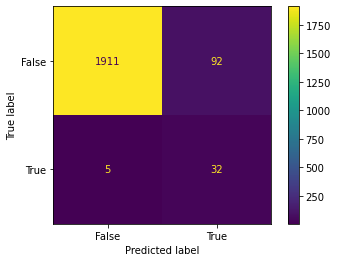

In [55]:
#Q7

clf = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
metrics.plot_confusion_matrix(clf,X_test,y_test)
print(metrics.accuracy_score(y_test, y_pred))

#We can see that we improved the prediciton when a faulty hdd came and we labeled it to be faulty!

Explain according to the label distribution which metrics we should choose to evaluate of our model


In [21]:
#Q8
#we should look at precision = TP/(TP+ FP) = TP/(predicted yes)
# we want to maximize the precision so we can have alot of TP and less of working hdd's classified faulty and we replaced them for no good reason.

# Also we should look at recall = TP/(TP+FN) 
# we want to maximize precision so we don't have alot of hdd's that we classified to be good but in real life they are faulty and need to be replaced.

# Improving the results
Find an improvment which will increase the performance in terms of model's accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

Explain in words what did you change, document the results before and after you suggested improvment

In [22]:
#Q9
# we can use parameter tuning and cross validation to improve our model's accuracy.